tensor(100., device='cuda:0')
13.962389541866292
100.00000223517424


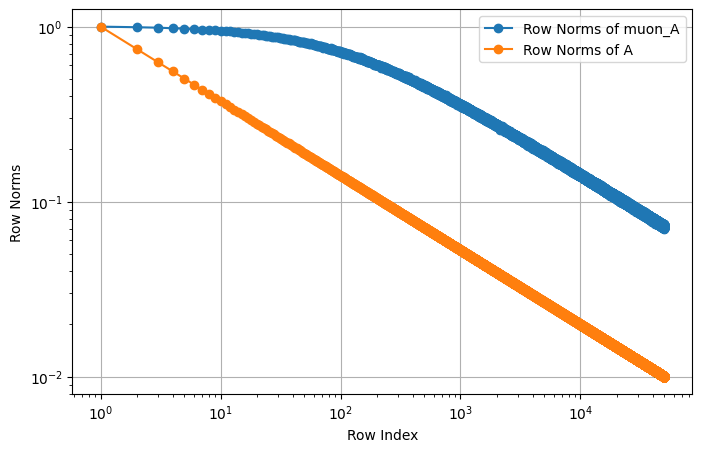

In [1]:
import torch
import matplotlib.pyplot as plt
import math

def zeropower_via_newtonschulz5(G, steps=5, eps=1e-7):
    """
    Newton-Schulz iteration to compute the zeroth power / orthogonalization of G. We opt to use a
    quintic iteration whose coefficients are selected to maximize the slope at zero. For the purpose
    of minimizing steps, it turns out to be empirically effective to keep increasing the slope at
    zero even beyond the point where the iteration no longer converges all the way to one everywhere
    on the interval. This iteration therefore does not produce UV^T but rather something like
    US'V^T where S' is diagonal with S_{ii}' ~ Uniform(0.5, 1.5).
    """
    assert len(G.shape) == 2
    a, b, c = (3.4445, -4.7750, 2.0315)

    X = G.clone()
    X /= (X.norm() + eps)  # ensure top singular value <= 1
    # We'll transpose if #rows > #cols
    if G.size(0) > G.size(1):
        X = X.T

    # Quintic iteration
    for _ in range(steps):
        A = X @ X.T
        B = A @ X
        X = a * X + b * B + c * A @ B

    # Final "cleanup" with standard NS iteration
    for _ in range(5):
        X = 1.5 * X - 0.5 * (X @ X.T) @ X

    if G.size(0) > G.size(1):
        X = X.T

    return X

# For reproducible results (optional):
torch.manual_seed(0)



# Dimensions:
m = 50000
n = 1000

condition_number = 100.0

alpha = math.log(condition_number)/math.log(m)

# 1) Create an m x n random sign matrix on GPU
A = torch.sign(torch.randn(m, n).cuda())

# 2) Rescale row i by 1/(i+1)**0.3
for i in range(m):
    A[i, :] /= (i + 1) ** alpha

print(A[0].norm()/A[-1].norm())

# 3) Use Newton-Schulz iteration to compute muon_A
muon_A = zeropower_via_newtonschulz5(A, steps=10, eps=1e-7)

# 4) Get **only** the singular values of A (compute_uv=False discards U and V)
#    In older versions of PyTorch:
#    svals = torch.svd(A, compute_uv=False)[1]
#    In newer versions of PyTorch, you can do:
#    svals = torch.linalg.svdvals(A)
# svals = torch.svd(A, compute_uv=False)[1]  # returns (U, S, V), but U, V are empty

# Bring singular values back to CPU for plotting
# sing_vals_cpu = svals.cpu().numpy()

# 5) Compute row norms of muon_A


# Plot the singular values
# plt.figure(figsize=(8, 5))
# plt.plot(range(1, n + 1), sing_vals_cpu, 'o-', label='Singular Values')
# plt.loglog()
# plt.xlabel('Singular Value Index')
# plt.ylabel('Value')
# plt.title(f'Singular Values of Rescaled Random {m}×{n} Matrix')
# plt.legend()
# plt.grid(True)
# plt.show()

# Plot the row norms of muon_A
plt.figure(figsize=(8, 5))
row_norms = muon_A.norm(dim=1)
row_norms_cpu = row_norms.cpu().numpy()
row_norms_cpu /= row_norms_cpu[0]
print(1.0/row_norms_cpu[-1])
plt.plot(range(1, m + 1), row_norms_cpu, 'o-', label='Row Norms of muon_A')

row_norms = A.norm(dim=1)
row_norms_cpu = row_norms.cpu().numpy()
row_norms_cpu /= row_norms_cpu[0]
print(1.0/row_norms_cpu[-1])
plt.plot(range(1, m + 1), row_norms_cpu, 'o-', label='Row Norms of A')

plt.loglog()
plt.xlabel('Row Index')
plt.ylabel('Row Norms')
# plt.title(f'Row Norms of muon_A (Rescaled, Zeropower) {m}×{n} Matrix')
plt.legend()
plt.grid(True)
plt.show()

tensor(100., device='cuda:0')
3.399550670170122
100.00000223517424


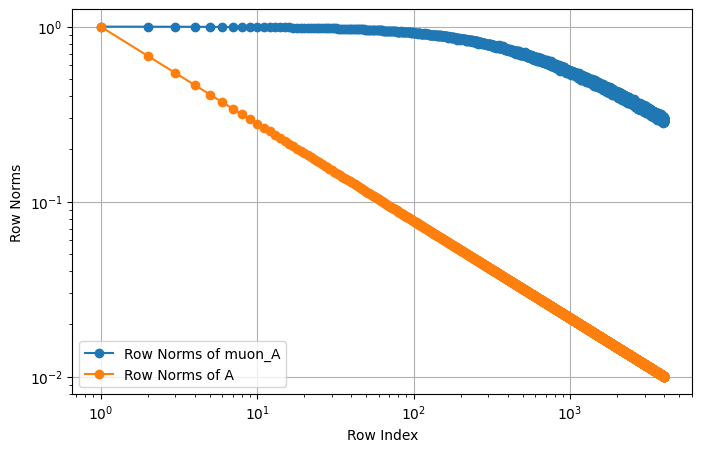

In [2]:
import torch
import matplotlib.pyplot as plt
import math

# For reproducible results (optional):
torch.manual_seed(0)



# Dimensions:
m = 4000
n = 1000

condition_number = 100.0

alpha = math.log(condition_number)/math.log(m)

# 1) Create an m x n random sign matrix on GPU
A = torch.sign(torch.randn(m, n).cuda())

# 2) Rescale row i by 1/(i+1)**0.3
for i in range(m):
    A[i, :] /= (i + 1) ** alpha

print(A[0].norm()/A[-1].norm())

# 3) Use Newton-Schulz iteration to compute muon_A
muon_A = zeropower_via_newtonschulz5(A, steps=10, eps=1e-7)

# 4) Get **only** the singular values of A (compute_uv=False discards U and V)
#    In older versions of PyTorch:
#    svals = torch.svd(A, compute_uv=False)[1]
#    In newer versions of PyTorch, you can do:
#    svals = torch.linalg.svdvals(A)
# svals = torch.svd(A, compute_uv=False)[1]  # returns (U, S, V), but U, V are empty

# Bring singular values back to CPU for plotting
# sing_vals_cpu = svals.cpu().numpy()

# 5) Compute row norms of muon_A


# Plot the singular values
# plt.figure(figsize=(8, 5))
# plt.plot(range(1, n + 1), sing_vals_cpu, 'o-', label='Singular Values')
# plt.loglog()
# plt.xlabel('Singular Value Index')
# plt.ylabel('Value')
# plt.title(f'Singular Values of Rescaled Random {m}×{n} Matrix')
# plt.legend()
# plt.grid(True)
# plt.show()

# Plot the row norms of muon_A
plt.figure(figsize=(8, 5))
row_norms = muon_A.norm(dim=1)
row_norms_cpu = row_norms.cpu().numpy()
row_norms_cpu /= row_norms_cpu[0]
print(1.0/row_norms_cpu[-1])
plt.plot(range(1, m + 1), row_norms_cpu, 'o-', label='Row Norms of muon_A')

row_norms = A.norm(dim=1)
row_norms_cpu = row_norms.cpu().numpy()
row_norms_cpu /= row_norms_cpu[0]
print(1.0/row_norms_cpu[-1])
plt.plot(range(1, m + 1), row_norms_cpu, 'o-', label='Row Norms of A')

plt.loglog()
plt.xlabel('Row Index')
plt.ylabel('Row Norms')
# plt.title(f'Row Norms of muon_A (Rescaled, Zeropower) {m}×{n} Matrix')
plt.legend()
plt.grid(True)
plt.show()

tensor(100., device='cuda:0')
1.0000184181744585
100.00000223517424


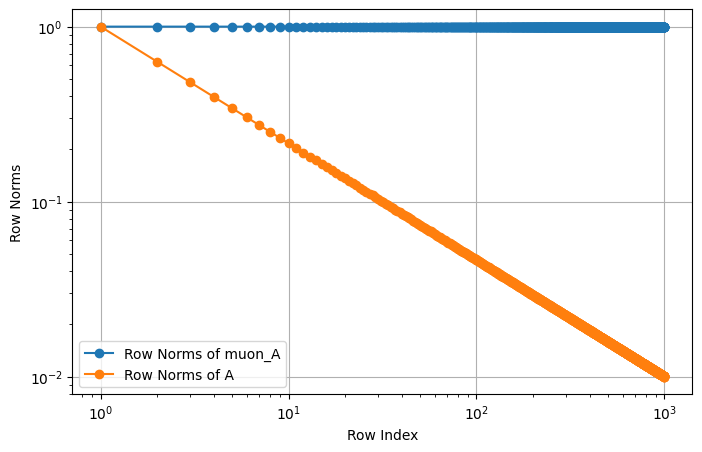

In [3]:
import torch
import matplotlib.pyplot as plt
import math

# For reproducible results (optional):
torch.manual_seed(0)



# Dimensions:
m = 1000
n = 1000

condition_number = 100.0

alpha = math.log(condition_number)/math.log(m)

# 1) Create an m x n random sign matrix on GPU
A = torch.sign(torch.randn(m, n).cuda())

# 2) Rescale row i by 1/(i+1)**0.3
for i in range(m):
    A[i, :] /= (i + 1) ** alpha

print(A[0].norm()/A[-1].norm())

# 3) Use Newton-Schulz iteration to compute muon_A
muon_A = zeropower_via_newtonschulz5(A, steps=10, eps=1e-7)

# 4) Get **only** the singular values of A (compute_uv=False discards U and V)
#    In older versions of PyTorch:
#    svals = torch.svd(A, compute_uv=False)[1]
#    In newer versions of PyTorch, you can do:
#    svals = torch.linalg.svdvals(A)
# svals = torch.svd(A, compute_uv=False)[1]  # returns (U, S, V), but U, V are empty

# Bring singular values back to CPU for plotting
# sing_vals_cpu = svals.cpu().numpy()

# 5) Compute row norms of muon_A


# Plot the singular values
# plt.figure(figsize=(8, 5))
# plt.plot(range(1, n + 1), sing_vals_cpu, 'o-', label='Singular Values')
# plt.loglog()
# plt.xlabel('Singular Value Index')
# plt.ylabel('Value')
# plt.title(f'Singular Values of Rescaled Random {m}×{n} Matrix')
# plt.legend()
# plt.grid(True)
# plt.show()

# Plot the row norms of muon_A
plt.figure(figsize=(8, 5))
row_norms = muon_A.norm(dim=1)
row_norms_cpu = row_norms.cpu().numpy()
row_norms_cpu /= row_norms_cpu[0]
print(1.0/row_norms_cpu[-1])
plt.plot(range(1, m + 1), row_norms_cpu, 'o-', label='Row Norms of muon_A')

row_norms = A.norm(dim=1)
row_norms_cpu = row_norms.cpu().numpy()
row_norms_cpu /= row_norms_cpu[0]
print(1.0/row_norms_cpu[-1])
plt.plot(range(1, m + 1), row_norms_cpu, 'o-', label='Row Norms of A')

plt.loglog()
plt.xlabel('Row Index')
plt.ylabel('Row Norms')
# plt.title(f'Row Norms of muon_A (Rescaled, Zeropower) {m}×{n} Matrix')
plt.legend()
plt.grid(True)
plt.show()

tensor(100.0000, device='cuda:0')
1.000024676931873
100.00000223517424


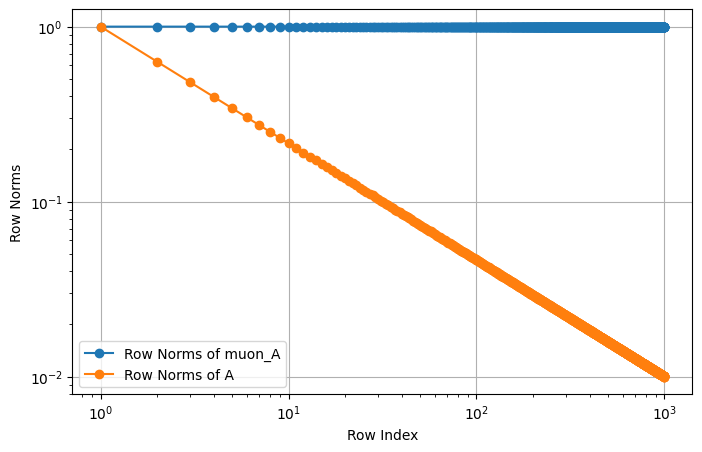

In [5]:
import torch
import matplotlib.pyplot as plt
import math

# For reproducible results (optional):
torch.manual_seed(0)



# Dimensions:
m = 1000
n = 1000

condition_number = 100.0

alpha = math.log(condition_number)/math.log(m)

# 1) Create an m x n random sign matrix on GPU
A = torch.sign(torch.randn(m, n).cuda())

# 2) Rescale row i by 1/(i+1)**0.3
for i in range(m):
    for j in range(n):
        A[i, j] /= ((i + 1) ** (alpha)) * ((j + 1) ** (alpha))

print(A[0].norm()/A[-1].norm())

# 3) Use Newton-Schulz iteration to compute muon_A
muon_A = zeropower_via_newtonschulz5(A, steps=10, eps=1e-7)

# 4) Get **only** the singular values of A (compute_uv=False discards U and V)
#    In older versions of PyTorch:
#    svals = torch.svd(A, compute_uv=False)[1]
#    In newer versions of PyTorch, you can do:
#    svals = torch.linalg.svdvals(A)
# svals = torch.svd(A, compute_uv=False)[1]  # returns (U, S, V), but U, V are empty

# Bring singular values back to CPU for plotting
# sing_vals_cpu = svals.cpu().numpy()

# 5) Compute row norms of muon_A


# Plot the singular values
# plt.figure(figsize=(8, 5))
# plt.plot(range(1, n + 1), sing_vals_cpu, 'o-', label='Singular Values')
# plt.loglog()
# plt.xlabel('Singular Value Index')
# plt.ylabel('Value')
# plt.title(f'Singular Values of Rescaled Random {m}×{n} Matrix')
# plt.legend()
# plt.grid(True)
# plt.show()

# Plot the row norms of muon_A
plt.figure(figsize=(8, 5))
row_norms = muon_A.norm(dim=1)
row_norms_cpu = row_norms.cpu().numpy()
row_norms_cpu /= row_norms_cpu[0]
print(1.0/row_norms_cpu[-1])
plt.plot(range(1, m + 1), row_norms_cpu, 'o-', label='Row Norms of muon_A')

row_norms = A.norm(dim=1)
row_norms_cpu = row_norms.cpu().numpy()
row_norms_cpu /= row_norms_cpu[0]
print(1.0/row_norms_cpu[-1])
plt.plot(range(1, m + 1), row_norms_cpu, 'o-', label='Row Norms of A')

plt.loglog()
plt.xlabel('Row Index')
plt.ylabel('Row Norms')
# plt.title(f'Row Norms of muon_A (Rescaled, Zeropower) {m}×{n} Matrix')
plt.legend()
plt.grid(True)
plt.show()

0
1
2
3
4
5
6
7
8
9
15.029341192648017
100.00001154840126


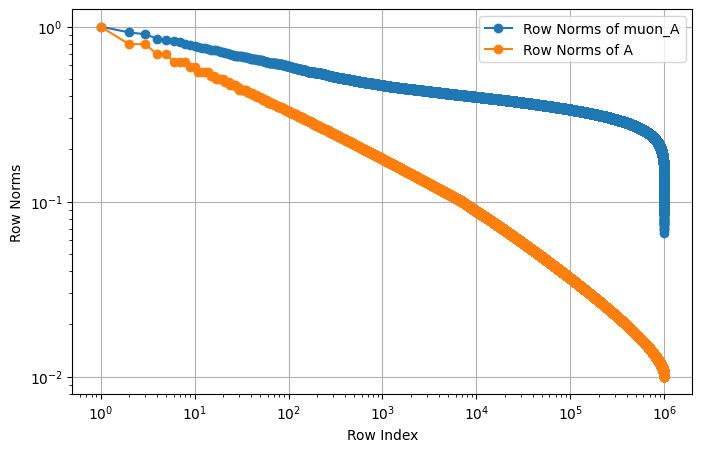

In [12]:
import torch
import matplotlib.pyplot as plt
import math

# For reproducible results (optional):
torch.manual_seed(0)



# Dimensions:
m = 1000
n = 1000

condition_number = 100.0

alpha = math.log(condition_number)/math.log(m)

row_norms1 = torch.zeros(m*n).cuda()
row_norms2 = torch.zeros(m*n).cuda()


for jj in range(10):
    print(jj)
    # 1) Create an m x n random sign matrix on GPU
    A = torch.sign(torch.randn(m, n).cuda())

    # 2) Rescale row i by 1/(i+1)**0.3
    for i in range(m):
        for j in range(n):
            A[i, j] /= ((i + 1) ** (alpha / 2.0)) * ((j + 1) ** (alpha / 2.0))

    # print(A[0, 0].norm()/A[-1, -1].norm())

    # 3) Use Newton-Schulz iteration to compute muon_A
    muon_A = zeropower_via_newtonschulz5(A, steps=10, eps=1e-7)

    # 4) Get **only** the singular values of A (compute_uv=False discards U and V)
    #    In older versions of PyTorch:
    #    svals = torch.svd(A, compute_uv=False)[1]
    #    In newer versions of PyTorch, you can do:
    #    svals = torch.linalg.svdvals(A)
    # svals = torch.svd(A, compute_uv=False)[1]  # returns (U, S, V), but U, V are empty

    # Bring singular values back to CPU for plotting
    # sing_vals_cpu = svals.cpu().numpy()

    # 5) Compute row norms of muon_A


    # Plot the singular values
    # plt.figure(figsize=(8, 5))
    # plt.plot(range(1, n + 1), sing_vals_cpu, 'o-', label='Singular Values')
    # plt.loglog()
    # plt.xlabel('Singular Value Index')
    # plt.ylabel('Value')
    # plt.title(f'Singular Values of Rescaled Random {m}×{n} Matrix')
    # plt.legend()
    # plt.grid(True)
    # plt.show()


    row_norms = muon_A.abs().flatten()
    row_norms1 += row_norms

    row_norms = A.abs().flatten()
    row_norms2 += row_norms

# Plot the row norms of muon_A
plt.figure(figsize=(8, 5))
row_norms = torch.sort(row_norms1, descending=True)[0]
row_norms_cpu = row_norms.cpu().numpy()
row_norms_cpu /= row_norms_cpu[0]
print(1.0/row_norms_cpu[-1])
plt.plot(range(1, m*n + 1), row_norms_cpu, 'o-', label='Row Norms of muon_A')


row_norms = torch.sort(row_norms2, descending=True)[0]
row_norms_cpu = row_norms.cpu().numpy()
row_norms_cpu /= row_norms_cpu[0]
print(1.0/row_norms_cpu[-1])
plt.plot(range(1, m*n + 1), row_norms_cpu, 'o-', label='Row Norms of A')

plt.loglog()
plt.xlabel('Row Index')
plt.ylabel('Row Norms')
# plt.title(f'Row Norms of muon_A (Rescaled, Zeropower) {m}×{n} Matrix')
plt.legend()
plt.grid(True)
plt.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
6.604022745540758
100.00003017486053


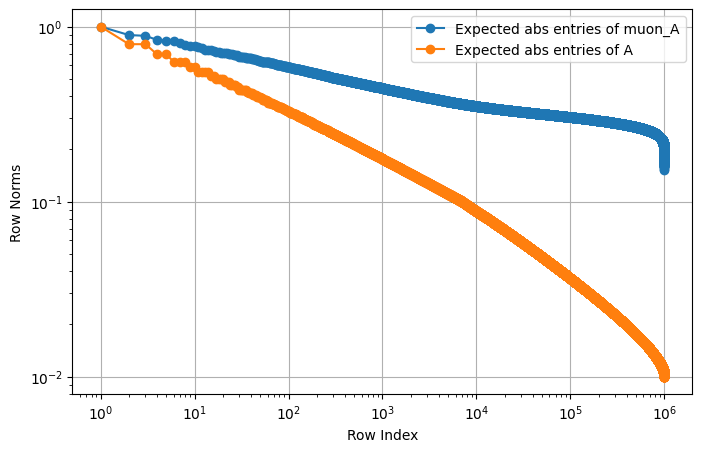

In [22]:
import torch
import matplotlib.pyplot as plt
import math

# For reproducible results (optional):
torch.manual_seed(0)



# Dimensions:
m = 1000
n = 1000

condition_number = 100.0

alpha = math.log(condition_number)/math.log(m)

row_norms1 = torch.zeros(m*n).cuda()
row_norms2 = torch.zeros(m*n).cuda()


for jj in range(40):
    print(jj)
    # 1) Create an m x n random sign matrix on GPU
    A = torch.sign(torch.randn(m, n).cuda())

    # 2) Rescale row i by 1/(i+1)**0.3
    for i in range(m):
        for j in range(n):
            A[i, j] /= ((i + 1) ** (alpha / 2.0)) * ((j + 1) ** (alpha / 2.0))

    # print(A[0, 0].norm()/A[-1, -1].norm())

    # 3) Use Newton-Schulz iteration to compute muon_A
    muon_A = zeropower_via_newtonschulz5(A, steps=10, eps=1e-7)

    # 4) Get **only** the singular values of A (compute_uv=False discards U and V)
    #    In older versions of PyTorch:
    #    svals = torch.svd(A, compute_uv=False)[1]
    #    In newer versions of PyTorch, you can do:
    #    svals = torch.linalg.svdvals(A)
    # svals = torch.svd(A, compute_uv=False)[1]  # returns (U, S, V), but U, V are empty

    # Bring singular values back to CPU for plotting
    # sing_vals_cpu = svals.cpu().numpy()

    # 5) Compute row norms of muon_A


    # Plot the singular values
    # plt.figure(figsize=(8, 5))
    # plt.plot(range(1, n + 1), sing_vals_cpu, 'o-', label='Singular Values')
    # plt.loglog()
    # plt.xlabel('Singular Value Index')
    # plt.ylabel('Value')
    # plt.title(f'Singular Values of Rescaled Random {m}×{n} Matrix')
    # plt.legend()
    # plt.grid(True)
    # plt.show()


    row_norms = muon_A.abs().flatten()
    row_norms1 += row_norms

    row_norms = A.abs().flatten()
    row_norms2 += row_norms


# Plot the row norms of muon_A
plt.figure(figsize=(8, 5))
row_norms = torch.sort(row_norms1, descending=True)[0]
row_norms_cpu = row_norms.cpu().numpy()
row_norms_cpu /= row_norms_cpu[0]
print(1.0/row_norms_cpu[-1])
plt.plot(range(1, m*n + 1), row_norms_cpu, 'o-', label='Expected abs entries of muon_A')


row_norms = torch.sort(row_norms2, descending=True)[0]
row_norms_cpu = row_norms.cpu().numpy()
row_norms_cpu /= row_norms_cpu[0]
print(1.0/row_norms_cpu[-1])
plt.plot(range(1, m*n + 1), row_norms_cpu, 'o-', label='Expected abs entries of A')

plt.loglog()
plt.xlabel('Row Index')
plt.ylabel('Row Norms')
# plt.title(f'Row Norms of muon_A (Rescaled, Zeropower) {m}×{n} Matrix')
plt.legend()
plt.grid(True)
plt.show()

4.441965803366711
88.86494692891164


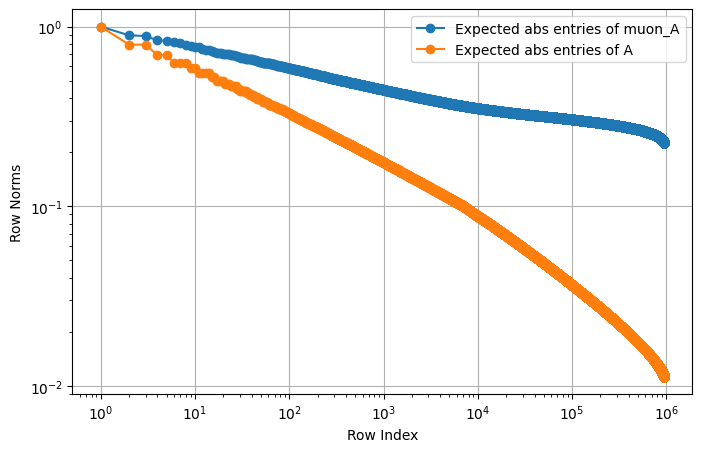

In [23]:
# Last few of the entries are small just due to chance (note we are sorting in descending order)

Z = int(.95*m*n)

# Plot the row norms of muon_A
plt.figure(figsize=(8, 5))
row_norms = torch.sort(row_norms1, descending=True)[0]
row_norms_cpu = row_norms.cpu().numpy()
row_norms_cpu /= row_norms_cpu[0]
row_norms_cpu = row_norms_cpu[:Z]
print(1.0/row_norms_cpu[-1])
plt.plot(range(1, Z + 1), row_norms_cpu, 'o-', label='Expected abs entries of muon_A')


row_norms = torch.sort(row_norms2, descending=True)[0]
row_norms_cpu = row_norms.cpu().numpy()
row_norms_cpu /= row_norms_cpu[0]
row_norms_cpu = row_norms_cpu[:Z]
print(1.0/row_norms_cpu[-1])
plt.plot(range(1, Z + 1), row_norms_cpu, 'o-', label='Expected abs entries of A')

plt.loglog()
plt.xlabel('Row Index')
plt.ylabel('Row Norms')
# plt.title(f'Row Norms of muon_A (Rescaled, Zeropower) {m}×{n} Matrix')
plt.legend()
plt.grid(True)
plt.show()

0
1
2
3
4
5
6
7
8
9
14.342006108973095
100.00001154840126


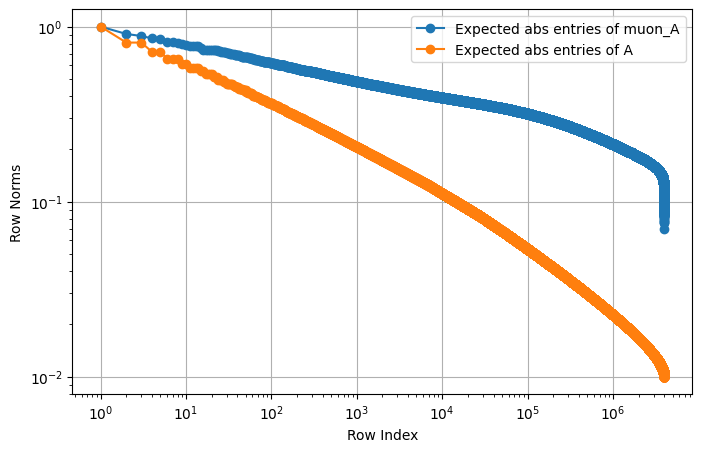

In [17]:
import torch
import matplotlib.pyplot as plt
import math

# For reproducible results (optional):
torch.manual_seed(0)



# Dimensions:
m = 4000
n = 1000

condition_number = 100.0

alpha = math.log(condition_number)/math.log(m*n)

row_norms1 = torch.zeros(m*n).cuda()
row_norms2 = torch.zeros(m*n).cuda()


for jj in range(10):
    print(jj)
    # 1) Create an m x n random sign matrix on GPU
    A = torch.sign(torch.randn(m, n).cuda())

    # 2) Rescale row i by 1/(i+1)**0.3
    for i in range(m):
        for j in range(n):
            A[i, j] /= ((i + 1) ** (alpha)) * ((j + 1) ** (alpha))

    # print(A[0, 0].norm()/A[-1, -1].norm())

    # 3) Use Newton-Schulz iteration to compute muon_A
    muon_A = zeropower_via_newtonschulz5(A, steps=10, eps=1e-7)

    # 4) Get **only** the singular values of A (compute_uv=False discards U and V)
    #    In older versions of PyTorch:
    #    svals = torch.svd(A, compute_uv=False)[1]
    #    In newer versions of PyTorch, you can do:
    #    svals = torch.linalg.svdvals(A)
    # svals = torch.svd(A, compute_uv=False)[1]  # returns (U, S, V), but U, V are empty

    # Bring singular values back to CPU for plotting
    # sing_vals_cpu = svals.cpu().numpy()

    # 5) Compute row norms of muon_A


    # Plot the singular values
    # plt.figure(figsize=(8, 5))
    # plt.plot(range(1, n + 1), sing_vals_cpu, 'o-', label='Singular Values')
    # plt.loglog()
    # plt.xlabel('Singular Value Index')
    # plt.ylabel('Value')
    # plt.title(f'Singular Values of Rescaled Random {m}×{n} Matrix')
    # plt.legend()
    # plt.grid(True)
    # plt.show()


    row_norms = muon_A.abs().flatten()
    row_norms1 += row_norms

    row_norms = A.abs().flatten()
    row_norms2 += row_norms


# Plot the row norms of muon_A
plt.figure(figsize=(8, 5))
row_norms = torch.sort(row_norms1, descending=True)[0]
row_norms_cpu = row_norms.cpu().numpy()
row_norms_cpu /= row_norms_cpu[0]
print(1.0/row_norms_cpu[-1])
plt.plot(range(1, m*n + 1), row_norms_cpu, 'o-', label='Expected abs entries of muon_A')


row_norms = torch.sort(row_norms2, descending=True)[0]
row_norms_cpu = row_norms.cpu().numpy()
row_norms_cpu /= row_norms_cpu[0]
print(1.0/row_norms_cpu[-1])
plt.plot(range(1, m*n + 1), row_norms_cpu, 'o-', label='Expected abs entries of A')

plt.loglog()
plt.xlabel('Row Index')
plt.ylabel('Row Norms')
# plt.title(f'Row Norms of muon_A (Rescaled, Zeropower) {m}×{n} Matrix')
plt.legend()
plt.grid(True)
plt.show()

6.8595303651537725
85.14168707505648


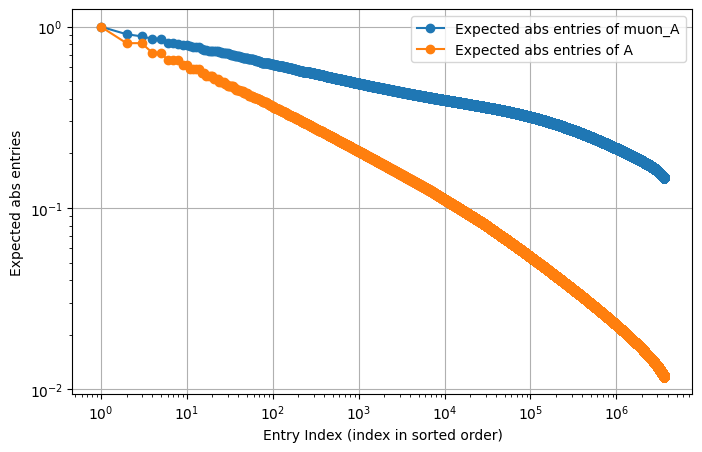

In [21]:
# Last few of the entries are small just due to chance (note we are sorting in descending order)

Z = int(.9*m*n)

# Plot the row norms of muon_A
plt.figure(figsize=(8, 5))
row_norms = torch.sort(row_norms1, descending=True)[0]
row_norms_cpu = row_norms.cpu().numpy()
row_norms_cpu /= row_norms_cpu[0]
row_norms_cpu = row_norms_cpu[:Z]
print(1.0/row_norms_cpu[-1])
plt.plot(range(1, Z + 1), row_norms_cpu[:Z], 'o-', label='Expected abs entries of muon_A')


row_norms = torch.sort(row_norms2, descending=True)[0]
row_norms_cpu = row_norms.cpu().numpy()
row_norms_cpu /= row_norms_cpu[0]
row_norms_cpu = row_norms_cpu[:Z]
print(1.0/row_norms_cpu[-1])
plt.plot(range(1, Z + 1), row_norms_cpu[:Z], 'o-', label='Expected abs entries of A')

plt.loglog()
plt.xlabel('Entry Index (index in sorted order)')
plt.ylabel('Expected abs entries')
# plt.title(f'Row Norms of muon_A (Rescaled, Zeropower) {m}×{n} Matrix')
plt.legend()
plt.grid(True)
plt.show()